In [1]:
# Import pandas as pd
import pandas as pd

# Read in the csv file and parse dates
StockPrices = pd.read_csv('MSFTPrices.csv', parse_dates=['Date'])

# Ensure the prices are sorted by Date
StockPrices = StockPrices.sort_values(by='Date')

# Print only the first five rows of StockPrices
print(StockPrices.head())

        Date    Open    High     Low     Close    Volume   Adjusted
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828


        Date    Open    High     Low     Close    Volume   Adjusted   Returns
0 2000-01-03  88.777  89.722  84.712  58.28125  53228400  38.527809       NaN
1 2000-01-04  85.893  88.588  84.901  56.31250  54119000  37.226345 -0.033780
2 2000-01-05  84.050  88.021  82.726  56.90625  64059600  37.618851  0.010544
3 2000-01-06  84.853  86.130  81.970  55.00000  54976600  36.358688 -0.033498
4 2000-01-07  82.159  84.901  81.166  55.71875  62013600  36.833828  0.013068


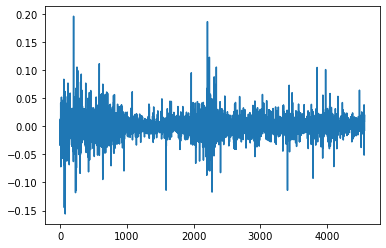

In [2]:
# Calculate the daily returns of the adjusted close price
import matplotlib.pyplot as plt
StockPrices['Returns'] = StockPrices['Adjusted'].pct_change()

# Check the first five rows of StockPrices
print(StockPrices.head())

# Plot the returns column over time
StockPrices['Returns'].plot()
plt.show()

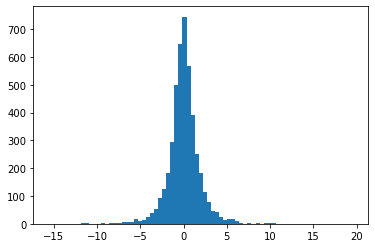

In [3]:
# Convert the decimal returns into percentage returns
percent_return = StockPrices['Returns']*100

# Drop the missing values
returns_plot = percent_return.dropna()

# Plot the returns histogram
plt.hist(returns_plot, bins = 75)
plt.show()

#  Calculate the implied annualized average return

In [4]:
# Import numpy as np
import numpy as np

# Calculate the average daily return of the stock
mean_return_daily = np.mean(StockPrices['Returns'])
print(mean_return_daily)

# Calculate the implied annualized average return
mean_return_annualized = ((1+mean_return_daily)**252)-1
print(mean_return_annualized)

0.0003777754643575769
0.09985839482852632


In [5]:
sigma_daily = np.std(StockPrices['Returns'])
print(sigma_daily)

# Calculate the daily variance
variance_daily = sigma_daily**2
print(variance_daily)

0.019341100408708328
0.0003740781650197374


In [6]:
# Annualize the standard deviation
sigma_annualized = sigma_daily*np.sqrt(252)
print(sigma_annualized)

# Calculate the annualized variance
variance_annualized = sigma_annualized**2
print(variance_annualized)

0.3070304505826317
0.09426769758497383


In [7]:
# Import skew from scipy.stats
from scipy.stats import skew

# Drop the missing values
clean_returns = StockPrices.Returns.dropna()

# Calculate the third moment (skewness) of the returns distribution
returns_skewness = skew(clean_returns)
print(returns_skewness)

0.21935459193067805


In [8]:
# Import kurtosis from scipy.stats
from scipy.stats import kurtosis

# Calculate the excess kurtosis of the returns distribution
excess_kurtosis = kurtosis(clean_returns)
print(excess_kurtosis)

# Derive the true fourth moment of the returns distribution
fourth_moment = excess_kurtosis + 3
print(fourth_moment)

10.314572618025519
13.314572618025519


# Тест на нормальность Шапиро-Уилк H0: распред нормальное

In [9]:
# Import shapiro from scipy.stats
from scipy.stats import shapiro

# Run the Shapiro-Wilk test on the stock returns
shapiro_results = shapiro(clean_returns)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)

Shapiro results: ShapiroResult(statistic=0.9003633260726929, pvalue=0.0)
P-value:  0.0


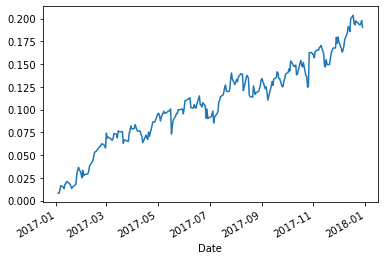

In [12]:
# Finish defining the portfolio weights as a numpy array
StockReturns = pd.read_csv('Big9Returns2017.csv', parse_dates = ['Date'], index_col = 'Date')
portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = StockReturns.mul(portfolio_weights, axis=1)

# Calculate the portfolio returns
StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+StockReturns["Portfolio"]).cumprod()-1)
CumulativeReturns.plot()
plt.show()

# Equal weighted portfolios

When comparing different portfolios, you often want to consider performance versus a naive equally-weighted portfolio. If the portfolio doesn't outperform a simple equally weighted portfolio, you might want to consider another strategy, or simply opt for the naive approach if all else fails. You can expect equally-weighted portfolios to tend to outperform the market when the largest companies are doing poorly. This is because even tiny companies would have the same weight in your equally-weighted portfolio as Apple or Amazon, for example.

<AxesSubplot:xlabel='Date'>

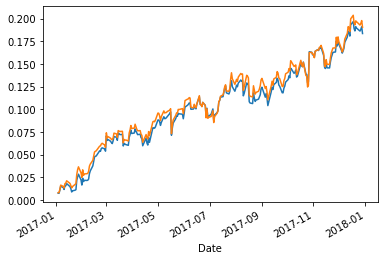

In [23]:
# How many stocks are in your portfolio?
numstocks = 9 

# Create an array of equal weights across all assets
portfolio_weights_ew = np.repeat(1/numstocks, numstocks)

# Calculate the equally-weighted portfolio returns
StockReturns['Portfolio_EW'] = StockReturns.iloc[:, 0:numstocks].mul(portfolio_weights_ew, axis=1).sum(axis=1)
StockReturns['CUM_port'] = ((1+StockReturns["Portfolio"]).cumprod()-1)
StockReturns['CUM_EW'] = ((1+StockReturns["Portfolio_EW"]).cumprod()-1)
StockReturns.CUM_EW.plot()
StockReturns.CUM_port.plot()

# Market cap weighted

In [29]:
# Create an array of market capitalizations (in billions)
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

# Calculate the market cap weights
mcap_weights = np.apply_along_axis(func1d = lambda x : x/np.sum(market_capitalizations), axis =0, arr = market_capitalizations)
StockReturns['Portfolio_MCap'] = StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)


<AxesSubplot:>

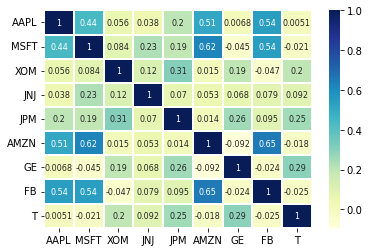

In [34]:
# Calculate the correlation matrix
import seaborn as sns
StockReturns = pd.read_csv('Big9Returns2017.csv', parse_dates = ['Date'], index_col = 'Date')
correlation_matrix = StockReturns.corr()
# Create a heatmap
sns.heatmap(correlation_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

In [35]:
# Calculate the covariance matrix
cov_mat = StockReturns.cov()

# Annualize the co-variance matrix
cov_mat_annual = cov_mat*252

In [37]:
# Calculate the portfolio standard deviation
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_mat_annual, portfolio_weights)))
print(portfolio_volatility)

0.08931417642713793


# Пусть у нас есть много портфелей с разными доходностями и волатильностями, как их сравнить? Для этой цели используют коэфицент шарпа

Since its revision by the original author, William Sharpe, in 1994,[2] the ex-ante Sharpe ratio is defined as:
$S_a = \frac{R_a-r_f}{\sigma_a} $ where $r_f$ - risk free return, $R_a$ - portfolio return

# MSR vs GMV portfolios .

# Идея в том чтобы нагенерить рандомных чисел в качетве коэфов портфеля и посмотреть на шарпы. Всегда есть портфель который максимизирует шарп - это MSR портфель. GBV - минимизирует волатильность

# CAPM - модель Portfolio_excess_return = beta*Market_index_excess return


# Excess_return = return - risk_free

# beta находится по формулам МНК

In [42]:
FamaFrenchData = pd.read_csv('FamaFrenchFactors.csv', parse_dates = ['Date'], index_col = 'Date')
FamaFrenchData.head()

,Portfolio,Market_Excess,SMB,HML,RMW,CMA,RF
Date,,,,,,,
2013-01-03,-0.005066,-0.0014,0.0014,0.0004,0.0020,0.0023,0.0
2013-01-04,0.004024,0.0055,0.0019,0.0043,-0.0037,0.0027,0.0
2013-01-07,0.004421,-0.0031,-0.0009,-0.0037,-0.0013,-0.0012,0.0
2013-01-08,-0.004659,-0.0027,0.0004,-0.0007,-0.0012,0.0009,0.0
2013-01-09,0.004636,0.0034,0.0024,-0.0041,-0.0007,-0.0015,0.0


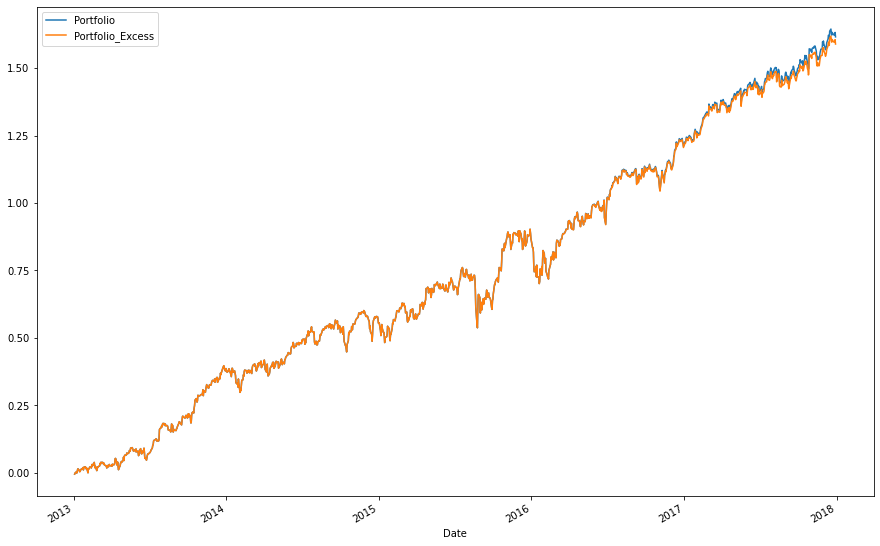

In [51]:
# Calculate excess portfolio returns
FamaFrenchData['Portfolio_Excess'] = FamaFrenchData.Portfolio - FamaFrenchData.RF
fig, ax = plt.subplots(figsize=(15,10))
# Plot returns vs excess returns
CumulativeReturns = ((1+FamaFrenchData[['Portfolio','Portfolio_Excess']]).cumprod()-1)
CumulativeReturns.plot(ax=ax)
plt.show()

In [52]:
# Calculate the co-variance matrix between Portfolio_Excess and Market_Excess
covariance_matrix = FamaFrenchData[['Portfolio_Excess', 'Market_Excess']].cov()

# Extract the co-variance co-efficient
covariance_coefficient = covariance_matrix.iloc[0, 1]
print(covariance_coefficient)

# Calculate the benchmark variance
benchmark_variance = FamaFrenchData['Market_Excess'].var()
print(benchmark_variance)

# Calculating the portfolio market beta
portfolio_beta = covariance_coefficient/benchmark_variance
print(portfolio_beta)

5.726126338154967e-05
5.8803350882118946e-05
0.9737755165745461


In [53]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
CAPM_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess', data=FamaFrenchData)

# Print adjusted r-squared of the fitted regression
CAPM_fit = CAPM_model.fit()
print(CAPM_fit.rsquared_adj)

# Extract the beta
regression_beta = CAPM_fit.params['Market_Excess']
print(regression_beta)

0.7942627160017839
0.9737755165745462


# FAMA - FENCH 3 factor model beta + SMB(Small - BIG) + HML(High - Low) + intercept(alpha)

# Та же регрессия но с 2 доп параметрами 


In [54]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML', data=FamaFrenchData)

# Fit the regression
FamaFrench_fit = FamaFrench_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench_fit.rsquared_adj
print(regression_adj_rsq)

0.8193910088585152


In [55]:
# Extract the p-value of the SMB factor
smb_pval = FamaFrench_fit.pvalues['SMB']

# If the p-value is significant, print significant
if smb_pval < 0.05:
    significant_msg = 'significant'
else:
    significant_msg = 'not significant'

# Print the SMB coefficient
smb_coeff = FamaFrench_fit.params['SMB']
print("The SMB coefficient is ", smb_coeff, " and is ", significant_msg)

The SMB coefficient is  -0.26215152743192616  and is  significant


In [57]:
portfolio_alpha = FamaFrench_fit.params['Intercept']
print(portfolio_alpha)

# Annualize your portfolio alpha
portfolio_alpha_annualized = (1+portfolio_alpha)**252-1
print(portfolio_alpha_annualized)

0.00018326665203183045
0.04726181730280854


# 5 factor model

In [58]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf 

# Define the regression formula
FamaFrench5_model = smf.ols(formula='Portfolio_Excess ~ Market_Excess + SMB + HML + RMW + CMA ', data=FamaFrenchData)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

# Extract the adjusted r-squared
regression_adj_rsq = FamaFrench5_fit.rsquared_adj
print(regression_adj_rsq)

0.8367245019225793


# Historical drawdown 

$HD =\frac{r_t}{RM} - 1 $ где RM - текущий максимум HD показывают просадку от лучшего результата

-3.608233764037496


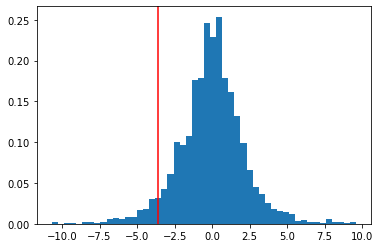

In [66]:
data = pd.read_csv('USO.csv', parse_dates = ['Date'], index_col = 'Date')
data['StockReturns_perc'] = data.USO.mul(100)
StockReturns_perc = data.StockReturns_perc
# Calculate historical VaR(95)
var_95 = np.percentile(StockReturns_perc, 5)
print(var_95)

# Sort the returns for plotting
sorted_rets = StockReturns_perc.sort_values(ascending = True)

# Plot the probability of each sorted return quantile
plt.hist(sorted_rets, density=True, bins =50, stacked=True)

# Denote the VaR 95 quantile
plt.axvline(x=var_95, color='r', linestyle='-', label="VaR 95: {0:.2f}%".format(var_95))
plt.show()

# Expected Shortfall, otherwise known as CVaR, or conditional value at risk, is simply the expected loss of the worst case scenarios of returns.

-5.054143158346779


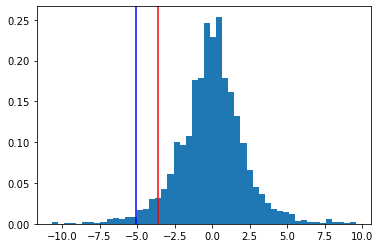

In [68]:
# Historical CVaR 95
cvar_95 = np.mean(StockReturns_perc[StockReturns_perc < var_95])
print(cvar_95)

# Sort the returns for plotting
sorted_rets = sorted(StockReturns_perc)

# Plot the probability of each return quantile
plt.hist(sorted_rets, density=True, bins = 50, stacked=True)

# Denote the VaR 95 and CVaR 95 quantiles
plt.axvline(x=var_95, color="r", linestyle="-", label='VaR 95: {0:.2f}%'.format(var_95))
plt.axvline(x=cvar_95, color='b', linestyle='-', label='CVaR 95: {0:.2f}%'.format(cvar_95))
plt.show()

# Var scaling square root!!!!

In [71]:
# Import norm from scipy.stats
from scipy.stats import norm

# Estimate the average daily return
mu = np.mean(StockReturns)

# Estimate the daily volatility
vol = np.std(StockReturns)

# Set the VaR confidence level
confidence_level = 0.05

# Calculate Parametric VaR
var_95 = norm.ppf(confidence_level, mu, vol)
print('Mean: ', str(mu), '\nVolatility: ', str(vol), '\nVaR(95): ', str(var_95))

Mean:  AAPL    0.001637
MSFT    0.001405
XOM    -0.000130
JNJ     0.000897
JPM     0.000997
AMZN    0.001856
GE     -0.002152
FB      0.001763
T      -0.000106
dtype: float64 
Volatility:  AAPL    0.011068
MSFT    0.009306
XOM     0.007029
JNJ     0.007194
JPM     0.010209
AMZN    0.013181
GE      0.012458
FB      0.010694
T       0.010675
dtype: float64 
VaR(95):  [-0.0165694  -0.01390218 -0.01169161 -0.01093551 -0.01579565 -0.01982375
 -0.02264449 -0.01582797 -0.01766494]


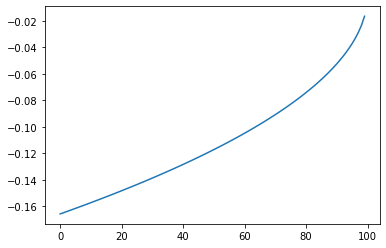

In [90]:
# Aggregate forecasted VaR
forecasted_values = np.empty([100, 2])

# Loop through each forecast period
for i in range(100):
    # Save the time horizon i
    forecasted_values[i, 0] = i
    # Save the forecasted VaR 95
    forecasted_values[i, 1] = var_95[0]*np.sqrt(i+1)
    
x = forecasted_values[:,0]
y = forecasted_values[:,1][::-1]
plt.plot(y)